# Iris Flower Classification

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression

## Viewing The Dataset

In [2]:
df = pd.read_csv("C:/Users/HP/Downloads/Iris/Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.drop("Id",inplace=True,axis=1)

In [6]:
# Create a new column target
df["Target"] = df["Species"].map({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})

In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [8]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
Target           0
dtype: int64

In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Visualizing The Data

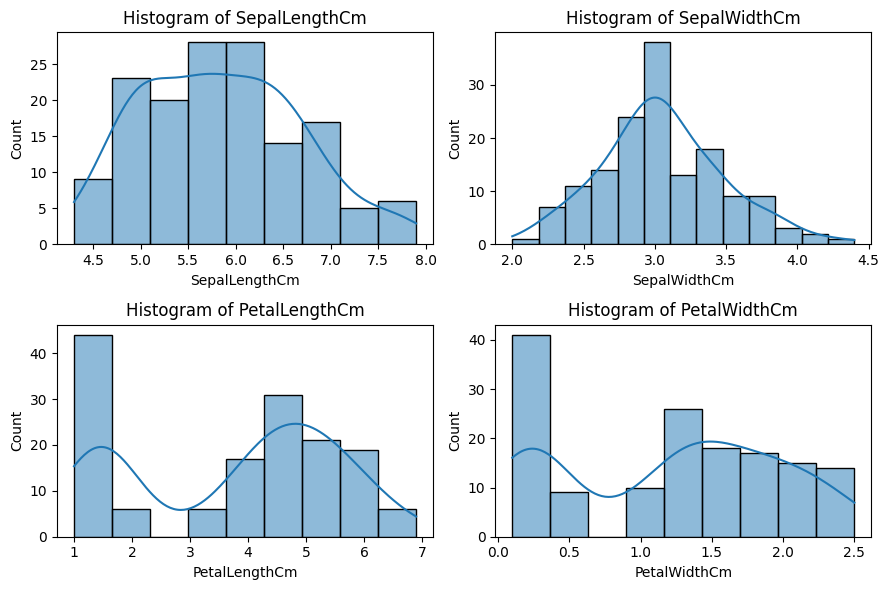

In [10]:
columns = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]

plt.figure(figsize = (9,6))

for i, col in enumerate(columns):
    plt.subplot(2,2,i+1)
    sns.histplot(data = df, x = col, kde = True)
    plt.title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

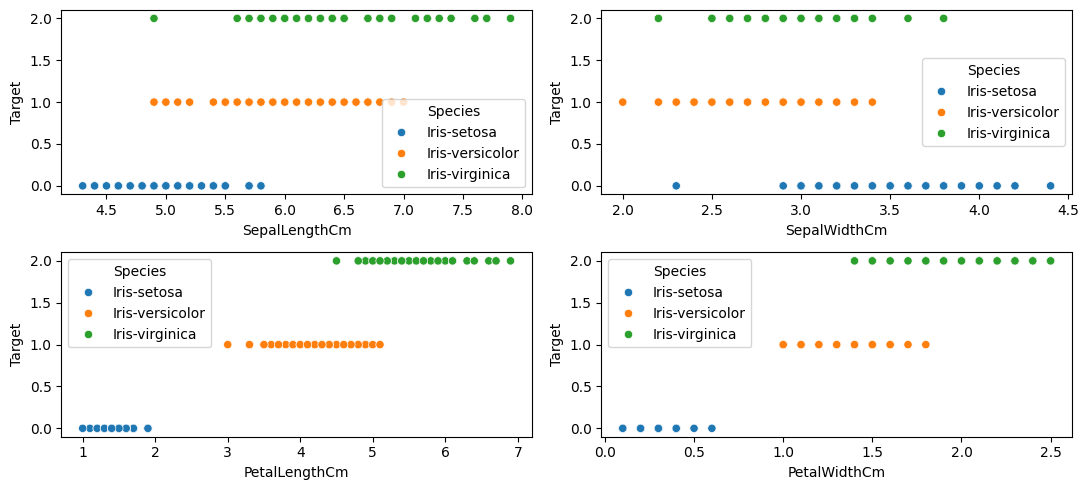

In [11]:
plt.figure(figsize=(11,5))

for i,col in enumerate(columns):
    plt.subplot(2,2,i+1)
    sns.scatterplot(data = df, x = col, y = "Target",hue = "Species")

plt.tight_layout()
plt.show()

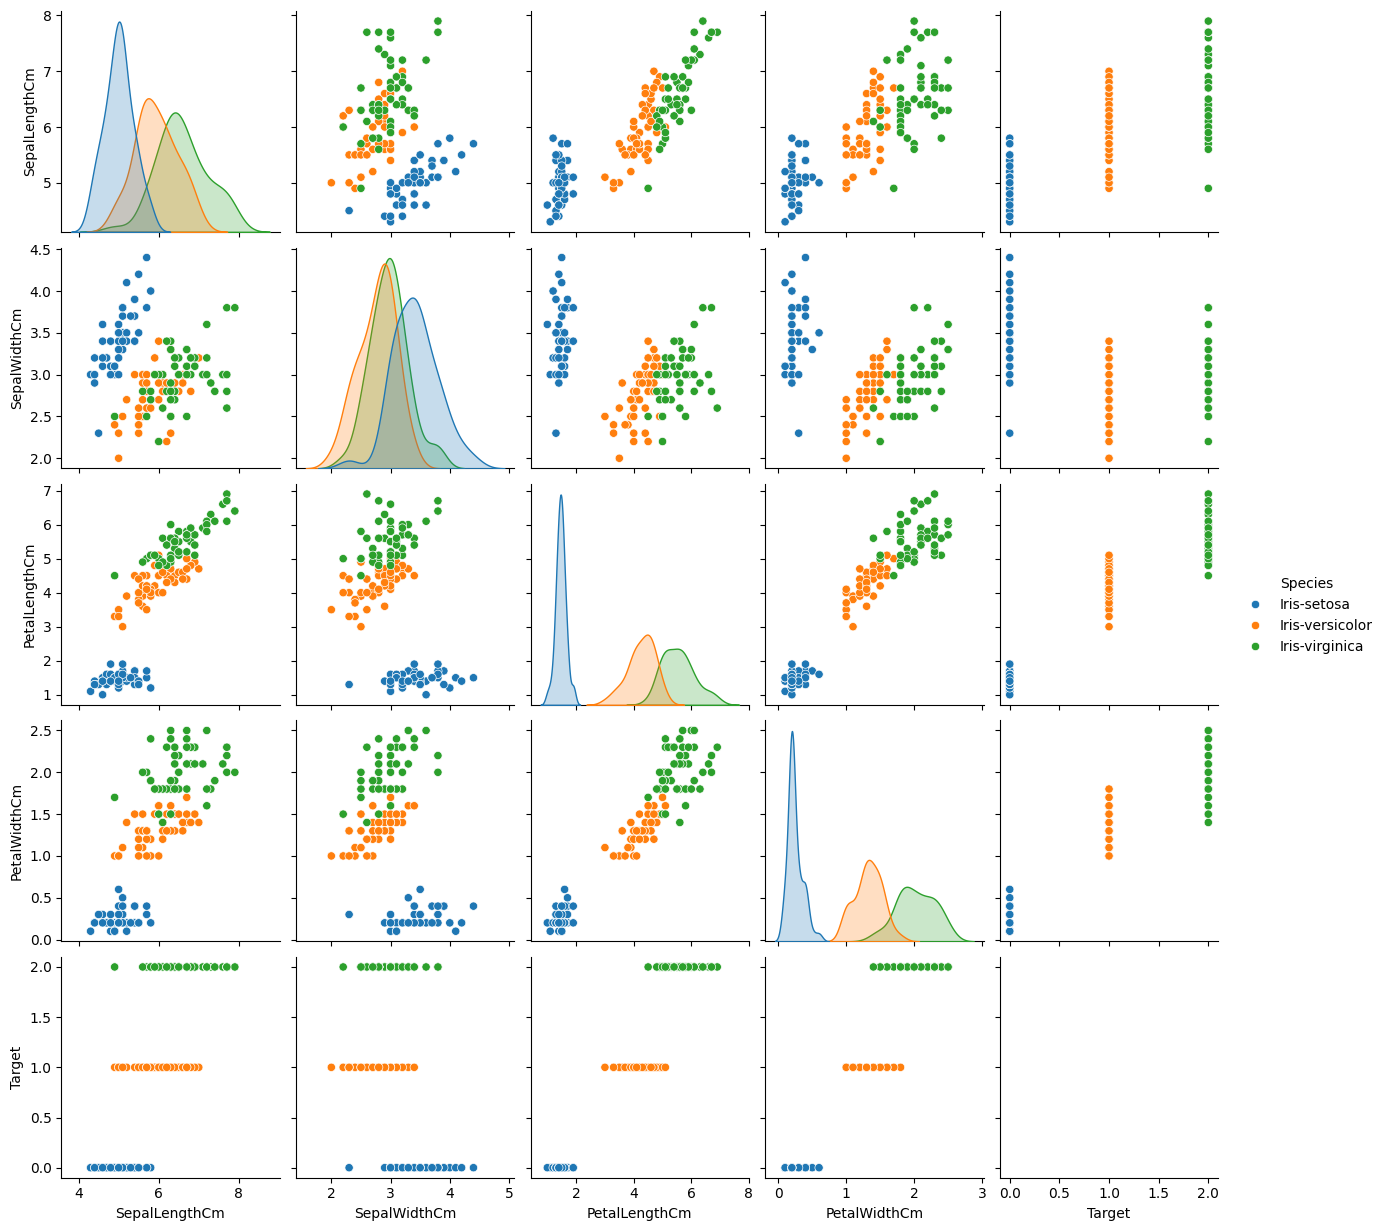

In [12]:
sns.pairplot(df, hue = "Species")

As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal. 

<Axes: >

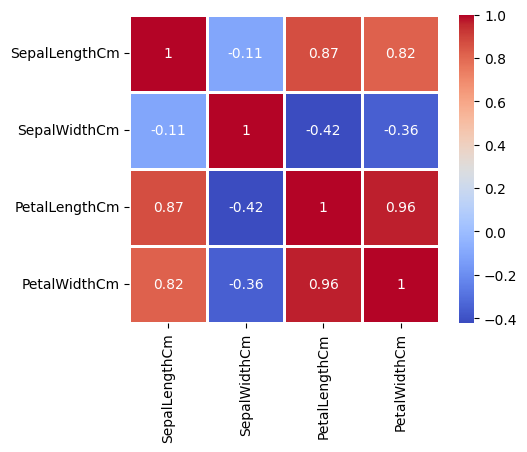

In [79]:
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
correlation_matrix = df[columns].corr()
plt.figure(figsize=(5,4))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', linewidth = 1)

## Train Test Split

In [13]:
df_train, df_test = train_test_split(df, test_size = 0.25)

In [14]:
print("df_train.shape: ",df_train.shape)
print("df_test.shape: ",df_test.shape)

df_train.shape:  (112, 6)
df_test.shape:  (38, 6)


## Prepare Data for Modelling
This invloves splitting the data into plain NumPy arrays.

In [15]:
X_train = df_train.drop(columns = ["Target","Species"]).values
y_train = df_train["Target"].values

X_test = df_test.drop(columns = ["Target","Species"]).values
y_test = df_test["Target"].values

## Modelling - Logistic Regression

In [23]:
model = LogisticRegression(max_iter = 200)

#### Using Cross Validation to evaluate Model

In [24]:
accuracies = cross_val_score(model, X_train, y_train, cv = 5, scoring = "accuracy")

In [25]:
np.mean(accuracies)

0.9545454545454545

## Where are we misclassifying points?

In [26]:
y_pred = cross_val_predict(model, X_train, y_train, cv = 5)

In [27]:
predicted_correctly_mask = y_pred == y_train

In [28]:
not_predicted_correctly = ~predicted_correctly_mask

In [29]:
# Points in X train that were not predicted correctly
X_train[not_predicted_correctly]

array([[6.2, 2.8, 4.8, 1.8],
       [5.9, 3.2, 4.8, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [6. , 2.7, 5.1, 1.6],
       [6. , 2.2, 5. , 1.5]])

In [30]:
y_pred

array([0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2,
       1, 2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1,
       2, 0, 2, 1, 2, 2, 0, 1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 2, 1,
       1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0,
       2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 2, 1,
       1, 1], dtype=int64)

In [31]:
df_predictions = df_train.copy()

In [32]:
df_predictions["correct_prediction"] = predicted_correctly_mask

In [33]:
df_predictions["prediction"] = y_pred

In [34]:
df_predictions["prediction_label"] = df_predictions["prediction"].map({0:"Iris-setosa", 1:"Iris-versicolor", 2:"Iris-virginica"})

In [35]:
df_predictions.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target,correct_prediction,prediction,prediction_label
29,4.7,3.2,1.6,0.2,Iris-setosa,0,True,0,Iris-setosa
99,5.7,2.8,4.1,1.3,Iris-versicolor,1,True,1,Iris-versicolor
101,5.8,2.7,5.1,1.9,Iris-virginica,2,True,2,Iris-virginica
120,6.9,3.2,5.7,2.3,Iris-virginica,2,True,2,Iris-virginica
38,4.4,3.0,1.3,0.2,Iris-setosa,0,True,0,Iris-setosa


In [83]:
def plot_incorrect_predictions(df_predictions, x_axis_feature, y_axis_feature):
    fig, ax = plt.subplots(2,2,figsize=(12,7))
    ax = ax.flatten()
    sns.scatterplot(data = df_predictions, x = x_axis_feature, y = y_axis_feature, hue = "prediction_label", ax = ax[0])
    sns.scatterplot(data = df_predictions, x = x_axis_feature, y = y_axis_feature, hue = "Species", ax = ax[1])
    sns.scatterplot(data = df_predictions, x = x_axis_feature, y = y_axis_feature, hue = "correct_prediction", ax = ax[2])
    plt.show()

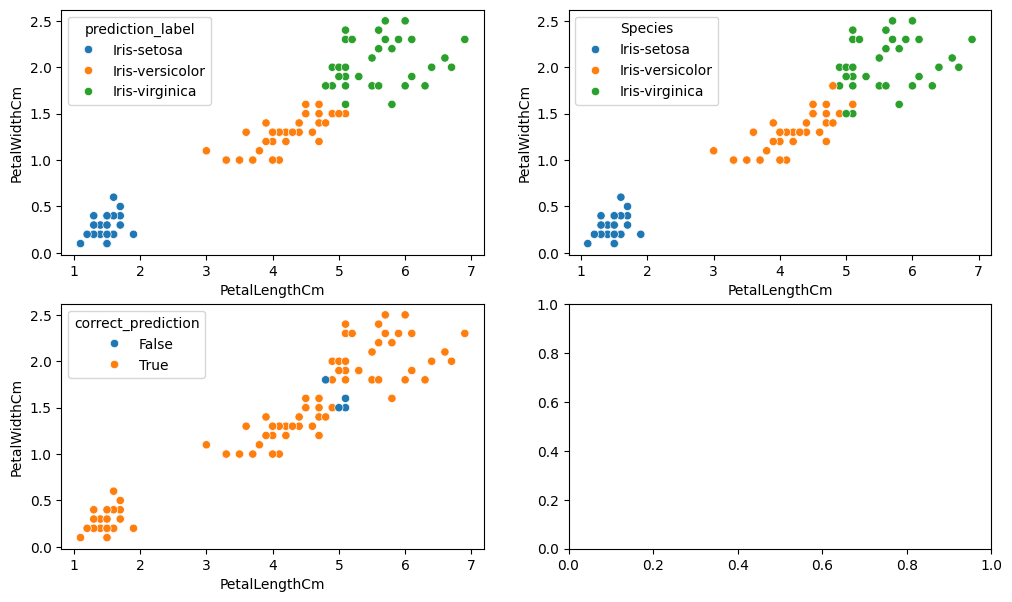

In [84]:
plot_incorrect_predictions(df_predictions, "PetalLengthCm","PetalWidthCm")

## Model Tuning
- Model tuning is the process of adjusting the hyperparameters of a Machine Learning model to achieve better performance.
- Hyperparameters are parameters that cannot be learned from the training data but need to be manually set by the user.


In [50]:
for reg_param in (1.9,2,2.3,2.9,3.5,4,4.1,4.2,5.5,6.5):
    print(reg_param)
    model = LogisticRegression(max_iter=200, C = reg_param)
    accuracies = cross_val_score(model, X_train, y_train, cv = 5, scoring = "accuracy")
    print(f"Accuracy: {np.mean(accuracies)*100:.2f}%")

1.9
Accuracy: 95.45%
2
Accuracy: 96.36%
2.3
Accuracy: 96.36%
2.9
Accuracy: 96.36%
3.5
Accuracy: 97.27%
4
Accuracy: 97.27%
4.1
Accuracy: 97.27%
4.2
Accuracy: 98.18%
5.5
Accuracy: 98.18%
6.5
Accuracy: 98.18%


## Final Model

In [62]:
model = LogisticRegression(max_iter=200, C = 4.2)

## How well does Model do on the Test test?

## Train Final Model using Full Dataset

In [63]:
model.fit(X_train, y_train)

LogisticRegression(C=4.2, max_iter=200)

In [64]:
y_test_pred = model.predict(X_test)

In [65]:
test_set_correctly_classified = y_test_pred == y_test
test_set_accuracy = np.mean(test_set_correctly_classified)

In [66]:
print(f"Test set accuracy: {test_set_accuracy*100:.2f}")

Test set accuracy: 92.11


In [67]:
test_set_correctly_classified

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True])

In [71]:
df_predictions_test = df_test.copy()
df_predictions_test["correct_prediction"] = test_set_correctly_classified
df_predictions_test["prediction"] = y_test_pred
df_predictions_test["prediction_label"] = df_predictions_test["prediction"].map({0:"Iris-setosa", 1:"Iris-versicolor", 2:"Iris-virginica"})

In [72]:
df_predictions_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target,correct_prediction,prediction,prediction_label
11,4.8,3.4,1.6,0.2,Iris-setosa,0,True,0,Iris-setosa
44,5.1,3.8,1.9,0.4,Iris-setosa,0,True,0,Iris-setosa
108,6.7,2.5,5.8,1.8,Iris-virginica,2,True,2,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica,2,True,2,Iris-virginica
127,6.1,3.0,4.9,1.8,Iris-virginica,2,True,2,Iris-virginica


## Conclusion

We achieved a 92.11% accuracy on the test dataset using a Logistic Regression model with these model parameters:

***
LogisticRegression(C=4.2, max_iter=200)***
